In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
distance = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000])*10**(-6)
power = np.array([0, 0.2, 0.4, 1.2, 3.4, 7.9, 15, 22, 26.7, 28.9, 29.7, 30.0])*10**(-3)*20

In [73]:
def gaussian(x, A, x0, sigma):
    return A*np.exp(-(x-x0)**2/2/sigma**2)

def err_func(x, A, x0, sigma):
    glist = []
    gtot = 0
    for i in range(1,len(x)):
        g = gaussian(x[i], A, x0, sigma)**2
        gtot += g
        glist.append(gtot)
    return glist

In [74]:
len(distance)

12

In [75]:
fit, cov = opt.curve_fit(err_func, distance, power[1:], p0 = [0.15, 6e-3, 2e-3])
print(fit)
dist = np.linspace(0, 0.012, 1000)
fitted = err_func(distance, *fit)
fitted2 = gaussian(dist, *fit)**2

[0.37975344 0.006497   0.00234504]


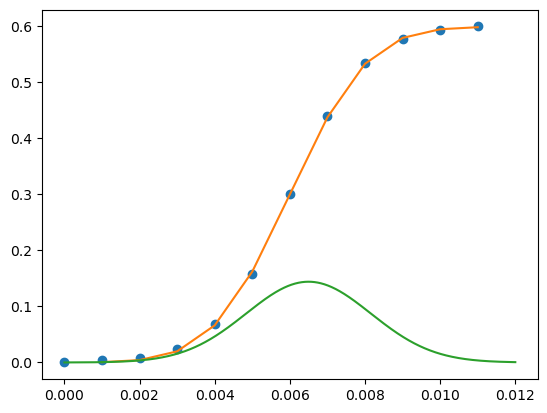

In [77]:
plt.plot(distance, power, 'o')
plt.plot(distance[1:], fitted)
plt.plot(dist, fitted2)

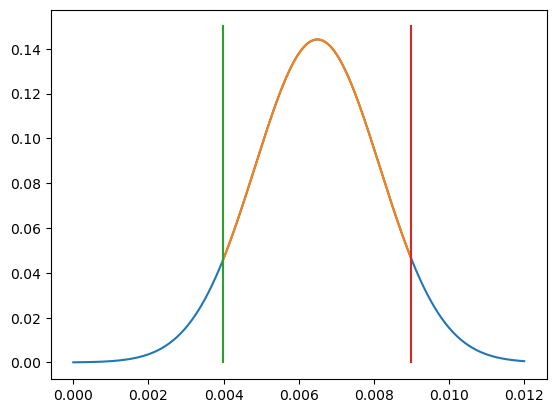

In [85]:
lb = 330
ub = 750
plt.plot(dist, fitted2)
plt.plot(dist[lb:ub], fitted2[lb:ub])
plt.plot([fit[1]-2.5e-3, fit[1]-2.5e-3], [0, 0.15])
plt.plot([fit[1]+2.5e-3, fit[1]+2.5e-3], [0, 0.15])

In [88]:
np.trapz(fitted2[lb:ub], dist[lb:ub])/np.trapz(fitted2, dist)

0.8713031473475494